# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 830 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 73.8 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 67.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 70.6 MB/s eta 0:00:01
     |██████████████████

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
from torch.utils.data import DataLoader

# Define transforms
transforms = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
for images, labels in train_loader:
    print(f"Batch of images has shape: {images.shape}")
    print(f"Batch of labels has shape: {labels.shape}")
    break

Batch of images has shape: torch.Size([100, 1, 28, 28])
Batch of labels has shape: torch.Size([100])


In [6]:
for images, labels in test_loader:
    print(f"Batch of images has shape: {images.shape}")
    print(f"Batch of labels has shape: {labels.shape}")
    break

Batch of images has shape: torch.Size([100, 1, 28, 28])
Batch of labels has shape: torch.Size([100])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the default transform to convert image data into a tensor. Also I used no major preprocessing steps apart from loading data into a batch_size of 100 and shuffling the training data so that the model accuracy improves and generalizes better instead of overfitting.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


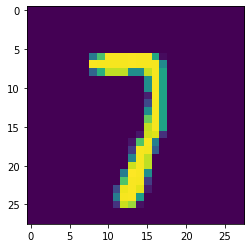

9


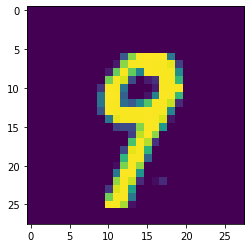

9


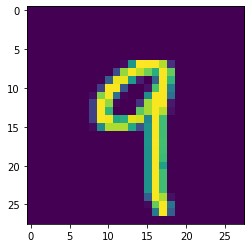

2


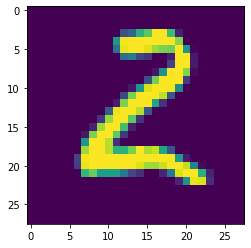

3


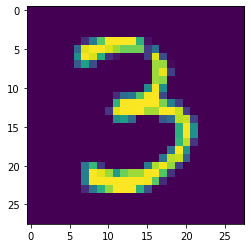

In [8]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
num_epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net.to(device)

train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct / len(train_loader):.2f}% training loss: {train_loss / len(train_loader):.5f}')
    train_loss_history.append(train_loss / len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct / len(test_loader):.2f}% validation loss: {val_loss / len(test_loader):.5f}')
    val_loss_history.append(val_loss / len(test_loader))

Epoch 1 training accuracy: 88.98% training loss: 0.39071
Epoch 1 validation accuracy: 94.04% validation loss: 0.19963
Epoch 2 training accuracy: 95.38% training loss: 0.15716
Epoch 2 validation accuracy: 96.24% validation loss: 0.13158
Epoch 3 training accuracy: 96.72% training loss: 0.10860
Epoch 3 validation accuracy: 96.47% validation loss: 0.11791
Epoch 4 training accuracy: 97.47% training loss: 0.08380
Epoch 4 validation accuracy: 97.15% validation loss: 0.09646
Epoch 5 training accuracy: 98.00% training loss: 0.06637
Epoch 5 validation accuracy: 97.51% validation loss: 0.08411
Epoch 6 training accuracy: 98.35% training loss: 0.05346
Epoch 6 validation accuracy: 97.53% validation loss: 0.08394
Epoch 7 training accuracy: 98.61% training loss: 0.04366
Epoch 7 validation accuracy: 97.69% validation loss: 0.07862
Epoch 8 training accuracy: 98.83% training loss: 0.03643
Epoch 8 validation accuracy: 97.67% validation loss: 0.08327
Epoch 9 training accuracy: 99.12% training loss: 0.02866

Plot the training loss (and validation loss/accuracy, if recorded).

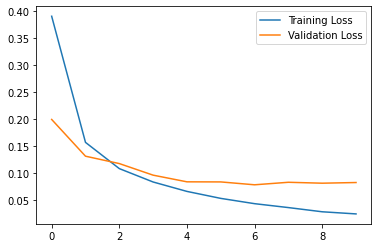

In [12]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
def test():
    net.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels = data
        
        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [14]:
for epoch in range(num_epochs):
    test()

Epoch 1 test accuracy: 97.16% test loss: 0.10010
Epoch 2 test accuracy: 98.67% test loss: 0.04253
Epoch 3 test accuracy: 99.43% test loss: 0.02212
Epoch 4 test accuracy: 99.69% test loss: 0.01303
Epoch 5 test accuracy: 99.90% test loss: 0.00725
Epoch 6 test accuracy: 99.94% test loss: 0.00481
Epoch 7 test accuracy: 100.00% test loss: 0.00306
Epoch 8 test accuracy: 100.00% test loss: 0.00236
Epoch 9 test accuracy: 100.00% test loss: 0.00191
Epoch 10 test accuracy: 100.00% test loss: 0.00163


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.layer3(x)
        return x
    
net2 = Net2()

In [16]:
optimizer = optim.Adam(net2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [17]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net2.to(device)

train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    val_loss = 0.0
    val_correct = 0
    net2.eval()
    for inputs, labels in test_loader:

        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 85.51% training loss: 0.48624
Epoch 1 validation accuracy: 94.23% validation loss: 0.19227
Epoch 2 training accuracy: 93.89% training loss: 0.20653
Epoch 2 validation accuracy: 96.02% validation loss: 0.13055
Epoch 3 training accuracy: 95.35% training loss: 0.15438
Epoch 3 validation accuracy: 96.67% validation loss: 0.10559
Epoch 4 training accuracy: 96.24% training loss: 0.12565
Epoch 4 validation accuracy: 97.08% validation loss: 0.09216
Epoch 5 training accuracy: 96.67% training loss: 0.10987
Epoch 5 validation accuracy: 97.33% validation loss: 0.08711
Epoch 6 training accuracy: 97.09% training loss: 0.09441
Epoch 6 validation accuracy: 97.34% validation loss: 0.08590
Epoch 7 training accuracy: 97.43% training loss: 0.08371
Epoch 7 validation accuracy: 97.69% validation loss: 0.07690
Epoch 8 training accuracy: 97.64% training loss: 0.07670
Epoch 8 validation accuracy: 97.75% validation loss: 0.07315
Epoch 9 training accuracy: 97.81% training loss: 0.07021

In [18]:
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels = data
        
        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [19]:
for epoch in range(num_epochs):
    test2()

Epoch 1 test accuracy: 97.79% test loss: 0.07101
Epoch 2 test accuracy: 98.96% test loss: 0.03578
Epoch 3 test accuracy: 99.60% test loss: 0.01896
Epoch 4 test accuracy: 99.82% test loss: 0.01135
Epoch 5 test accuracy: 99.91% test loss: 0.00736
Epoch 6 test accuracy: 99.95% test loss: 0.00498
Epoch 7 test accuracy: 99.98% test loss: 0.00357
Epoch 8 test accuracy: 99.99% test loss: 0.00266
Epoch 9 test accuracy: 100.00% test loss: 0.00208
Epoch 10 test accuracy: 100.00% test loss: 0.00170


## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
torch.save(net, "net.pth")
torch.save(net2, "net2.pth")